# **Laporan Praktikum IV Machine Learning**

'''
=================================================
                      Oleh:
Nama  : Resi Popita

NPM   : F1F022036

# Latar Belakang

  Ensemble Learning merupakan salah satu pendekatan paling kuat, komprehensif, dan efektif dalam bidang Machine Learning. Pendekatan ini berfokus pada penggabungan beberapa model individu, yang sering disebut sebagai base learners atau weak learners, untuk menghasilkan model komposit yang lebih akurat, stabil, dan memiliki kemampuan generalisasi yang lebih baik dibandingkan model tunggal (Zhou, 2021). Salah satu kekuatan utama Ensemble Learning adalah kemampuannya dalam mengurangi variance dan bias pada model prediksi. Model tunggal seperti Decision Tree atau Logistic Regression sering kali memiliki keterbatasan tertentu, misalnya rentan terhadap perubahan kecil pada data atau tidak mampu menangkap pola kompleks secara menyeluruh. Dengan menggabungkan beberapa model berbeda yang bekerja pada subset data yang berbeda, menggunakan algoritma berbeda, atau menerapkan asumsi yang berbeda pula, ensemble dapat menghasilkan model akhir yang lebih robust dan kurang rentan terhadap overfitting (Kuncheva, 2014). Hal ini sejalan dengan teori bias–variance trade-off, di mana metode ensemble secara praktis membantu menyeimbangkan fleksibilitas dan stabilitas model.

Terdapat beberapa pendekatan utama dalam Ensemble Learning yang banyak digunakan pada penelitian maupun aplikasi praktis. Pendekatan pertama adalah Voting, yang menggabungkan prediksi dari beberapa model dan menentukan hasil akhir berdasarkan suara mayoritas (hard voting) atau rata-rata probabilitas (soft voting). Pendekatan kedua adalah Bagging (Bootstrap Aggregating), yang bekerja dengan membangun banyak model menggunakan sampel bootstrap dari data asli, lalu menggabungkan prediksinya; Random Forest merupakan contoh klasik dari metode ini (Breiman, 1996). Pendekatan ketiga adalah Boosting, yang melatih model secara bertahap dengan fokus pada data yang sulit diprediksi oleh model sebelumnya. Contoh algoritma populer dalam kategori ini meliputi AdaBoost, Gradient Boosting, dan Extreme Gradient Boosting (XGBoost), yang dikenal sangat kuat untuk menangani data kompleks (Friedman, 2001; Chen & Guestrin, 2016). Pendekatan terakhir adalah Stacking, di mana prediksi beberapa model dasar digabungkan dan digunakan sebagai input bagi model lain (meta-learner), biasanya memberikan hasil yang lebih optimal dibandingkan pendekatan tunggal atau kombinasi sederhana (Wolpert, 1992).



# Rumusan Masalah

Adapun rumusan masalah pada praktikum ini adalah sebagai berikut:
1. Bagaimana menjelaskan konsep dasar Random Forest.
2. Bagaimana mengimplementasikan Random Forest untuk klasifikasi dan   regresi menggunakan scikit-learn.
3. Bagaimana melakukan evaluasi model menggunakan metrik performa.
4. Bagaimana menginterpretasikan hasil pemodelan.

# Tujuan Penelitian

Berdasarkan rumusan masalah diatas diperoleh tujuan sebagai berikut:


1.   Menjelaskan konsep dasar Random Forest.
2. Mengimplementasikan Random Forest untuk klasifikasi dan regresi menggunakan scikit-learn.
3. Melakukan evaluasi model menggunakan metrik performa.
4. Menginterpretasikan hasil pemodelan.



# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.2 MB/s eta 0:00:00


In [2]:
# Import Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Import Scikit-learn Dasar & Utilitas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

# Import Ensemble Methods (Gabungan)
from sklearn.ensemble import (
    VotingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    StackingClassifier
)

# Memuat Data

In [3]:
# Data Loading

health_df = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/mental_health_dataset.csv', sep=";")
health_df


,age,gender,employment_status,work_environment,mental_health_history,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,9,6.1,0,28,21,32,56.7,High


# **Analisis Data Eksploratif**

Analisis variabel Target (Y) Mental Health Risk

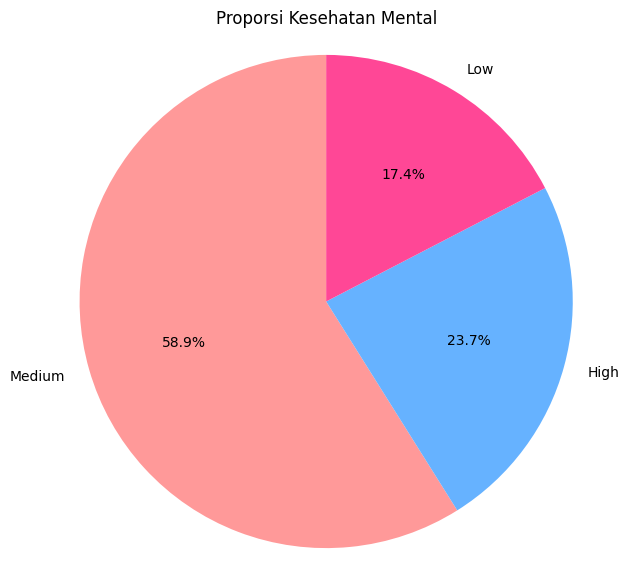

In [4]:
# 1. Hitung jumlah untuk setiap kategori
counts = health_df['mental_health_risk'].value_counts()
labels = counts.index
sizes = counts.values

# 2. Buat Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF','#FF4796'])

plt.title('Proporsi Kesehatan Mental')
plt.axis('equal')  # Memastikan pie chart terlihat bulat
plt.show()

Dari hasil tersebut terlihat bahwa mayoritas responden berada pada tingkat risiko kesehatan mental kategori Medium, yaitu mencapai 58,9%. Sementara itu, kelompok dengan risiko tinggi (High) menyumbang sekitar 23,7%, dan proporsi paling kecil terdapat pada kategori rendah (Low) dengan 17,4%. Temuan ini menunjukkan bahwa sebagian besar responden tidak berada pada risiko rendah, melainkan berada pada tingkat sedang yang masih membutuhkan perhatian.

Analisis variabel fitur (X)

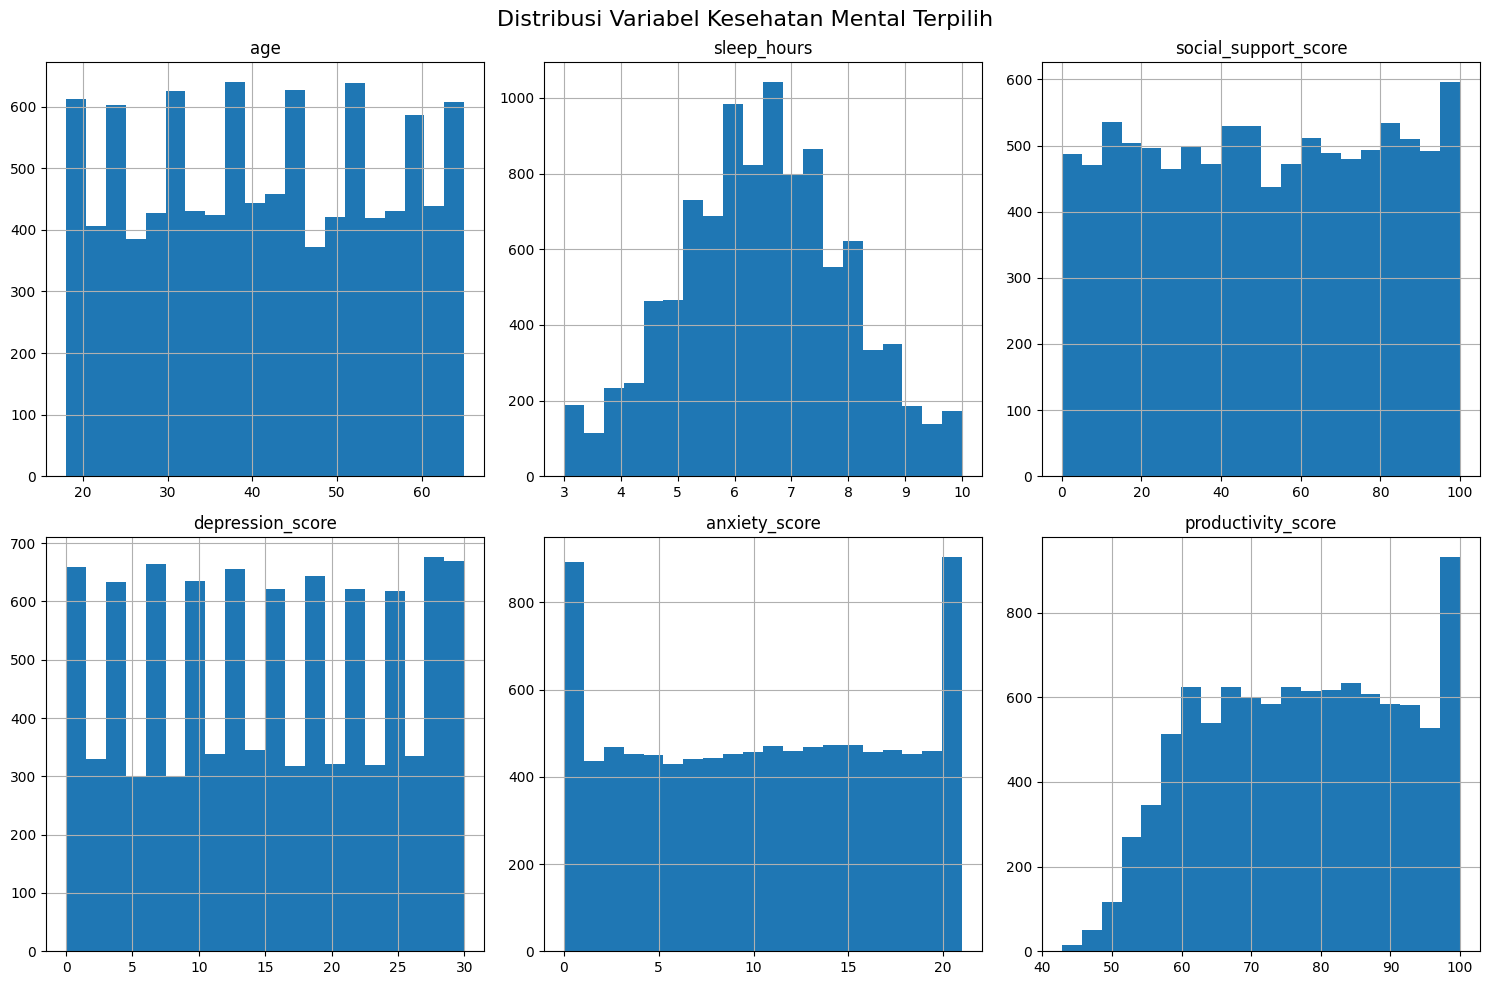

In [5]:
selected_columns = [
    'age',
    'sleep_hours',
    'social_support_score',
    'depression_score',
    'anxiety_score',
    'productivity_score'
]

# 2. Plot histogram hanya untuk kolom tersebut
# layout=(2, 3) artinya kita menyusun gambar dalam 2 baris dan 3 kolom
health_df[selected_columns].hist(bins=20, figsize=(15, 10), layout=(2, 3))

plt.suptitle('Distribusi Variabel Kesehatan Mental Terpilih', fontsize=16)
plt.tight_layout() # Agar label tidak berhimpitan
plt.show()


Dari hasil histogram pada variabel numerik, terlihat bahwa sebagian besar variabel memiliki pola distribusi yang cenderung merata atau uniform, di mana nilai-nilai seperti age, social_support_score, depression_score, dan anxiety_score tersebar cukup seimbang di seluruh rentang data tanpa menunjukkan titik kumpul tertentu.

Berbeda dari variabel lainnya, terdapat dua variabel yang memperlihatkan bentuk distribusi yang lebih khas. Variabel sleep_hours menampilkan pola yang menyerupai distribusi normal, ditandai dengan bentuk kurva yang simetris dan pemusatan data pada kisaran 6–7 jam tidur. Selain itu, variabel productivity_score menunjukkan kemiringan negatif (left-skewed), di mana sebagian besar nilai berkumpul pada skor yang lebih tinggi, yaitu sekitar rentang 60 hingga 100.

Analisis korelasi antar fitur

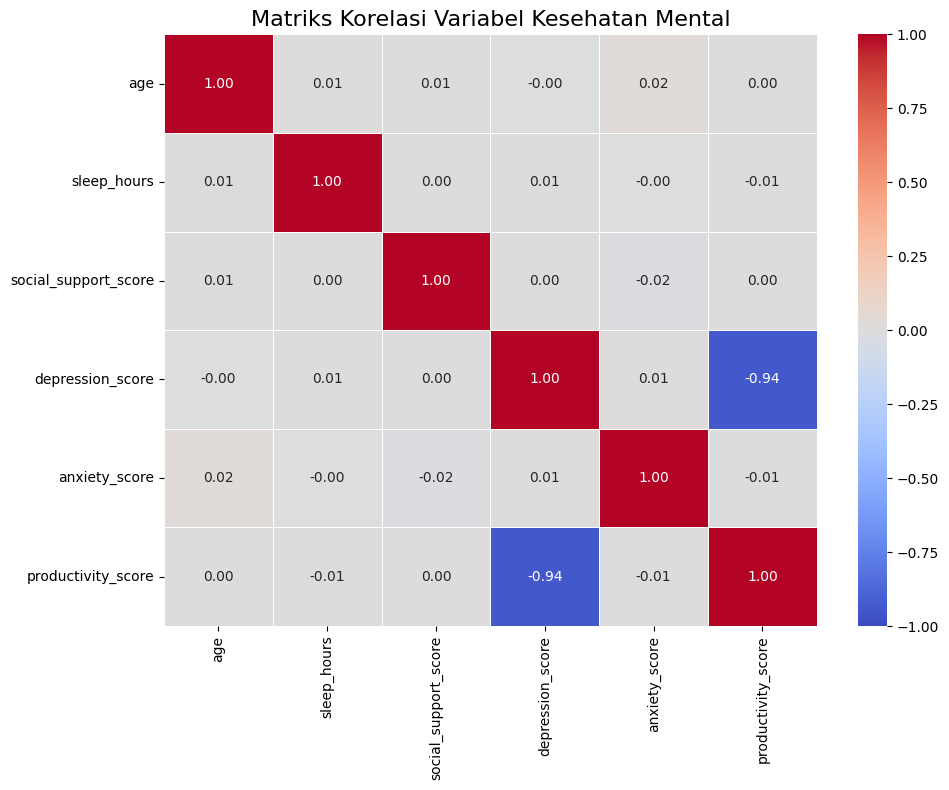

In [6]:
X_selected = health_df[selected_columns]

# 2. Hitung matriks korelasi
# PERBAIKAN: Gunakan .corr(), bukan .corr_matrix()
corr_matrix = X_selected.corr()

# 3. Buat Plot Heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix,
            annot=True,        # Menampilkan angka
            cmap='coolwarm',   # Warna
            fmt=".2f",         # Format 2 desimal
            linewidths=0.5,    # Garis pemisah
            vmin=-1, vmax=1)   # Batas skala

plt.title('Matriks Korelasi Variabel Kesehatan Mental', fontsize=16)
plt.tight_layout()
plt.show()

Berdasarkan analisis korelasi yang dilakukan terdapat korelasi negatif variabel depressin_score dan productivity_score sebesar 0,94. oleh karena itu salah satu variabelnya dihapus yaitu variabel productivity_score

# _Feature Engineering_

## A - Missing Value

Berikut pengecekan missing value:

In [7]:
print(health_df.isnull().sum())

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64


berdasarkan hasil didapatkan bahwa pada dataset ini tidak terdapat missing value

# **B - Kardinalitas**

Berikut merupakan pengecekan kardinalitas pada fitur:

In [8]:
# Menampilkan jumlah nilai unik untuk setiap kolom
print(health_df.nunique())

age                        48
gender                      4
employment_status           4
work_environment            3
mental_health_history       2
stress_level               10
sleep_hours                71
physical_activity_days      8
depression_score           31
anxiety_score              22
social_support_score      101
productivity_score        546
mental_health_risk          3
dtype: int64


Karena beberapa fitur yang bertipe kategorik memiliki kategori yang tidak lebih dari 10 maka proses kardinalitas tidak dilakukan


# **C- Splitting Data**

In [9]:
# Split between Features and Target
X = health_df.drop(['productivity_score', 'gender', 'employment_status','work_environment', 'mental_health_history','mental_health_risk'], axis=1)
y = health_df['mental_health_risk']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (8000,)
Test Size  :  (2000,)


Proses pemisahan data menggunakan metode train–test split dengan rasio 80% untuk pelatihan dan 20% untuk pengujian menghasilkan sebanyak 8000 data pada subset pelatihan. Pada bagian ini, terdapat 7 variabel prediktor numerik yang digunakan, yaitu age, stress_level, sleep_hours, physical_activity_days, depression_score, anxiety_score, dan social_support_score. Sementara itu, subset pengujian berisi 2000 observasi yang digunakan untuk mengevaluasi kinerja model.

# **D- Handling Outlier**

Berikut merupakan proses handling outlier:

In [10]:
# ===============================
# Hitung Q1, Q3, dan IQR (Gunakan X_train_numerik)
# ===============================
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ===============================
# Hitung jumlah outlier
# ===============================
outlier_mask_train = (X_train< lower_bound) | (X_train > upper_bound)
outlier_count_train = outlier_mask_train.sum()

print("\nJumlah outlier per variabel (Data Training):")
print(outlier_count_train)


Jumlah outlier per variabel (Data Training):
age                       0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
dtype: int64


Berdasarkah hasil didapatkan bahwa tidak terdapat outlier pada data ini oleh karena itu proses handling outlier tidak perlu dilakukan.

# **E- Scaling**

Berikut merupakan proses scalling pada fitur:

In [11]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Proses standarisasi dilakukan dengan menggunakan metode standar scaller

# **F- Encoding**

Berikut merupakan proses encoding pada variabel target:

In [12]:
# 1. Buat satu objek encoder saja
encoder = LabelEncoder()
# 2. Fit (pelajari kelas) hanya pada y_train
encoder.fit(y_train)
# 3. Transform (ubah) y_train dan y_test
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
# 4. Melihat hasil
print("y_train_encoded (5 data awal):")
print(y_train_encoded[:5])
# 5. Menyimpan daftar kelas asli
# PENTING: Ambil .classes_ dari objek 'encoder' yang sudah di-fit
classes = encoder.classes_
print("\nKelas asli target:")
print(classes)

y_train_encoded (5 data awal):
[2 1 2 1 2]

Kelas asli target:
['High' 'Low' 'Medium']


Tahap encoding dilakukan untuk mengonversi variabel target yang semula berupa kategori yaitu high, low, dan medium menjadi representasi angka agar dapat diproses oleh model machine learning. Setelah proses pengodean, diperoleh bahwa label 0 mewakili kelas high, label 1 mewakili kelas low, dan label 2 mewakili kelas medium. Encoder tersebut kemudian diterapkan pada data latih dan data uji sehingga target berubah menjadi y_train_encoded dan y_test_encoded. Selain itu, daftar label asli turut disimpan untuk memastikan bahwa hasil prediksi model dapat dikembalikan ke bentuk kategorinya semula.

# G- Balancing Data

Berdasarkan hasil proporsi kelas tidak perlu dilakukan proses balancing data


# **Training Model**

# A - Bagging

erikut merupakan pembentukan model dengan Random Forest - Using Decision Tree as Base Model:

In [13]:
# Model Training - Random Forest - Using Decision Tree as Base Model
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42)

rnd_clf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(max_depth=5, random_state=42)

In [14]:
# Model Evaluation

y_train_pred = rnd_clf.predict(X_train_scaled)
y_test_pred = rnd_clf.predict(X_test_scaled)

print('F1 Score - Train - Random Forest : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Random Forest  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Random Forest :  0.9049323704764431
F1 Score - Test - Random Forest  :  0.906535672323991


Didapatkan akurasi pada data testing sebesar 90%

/tmp/ipython-input-683087696.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


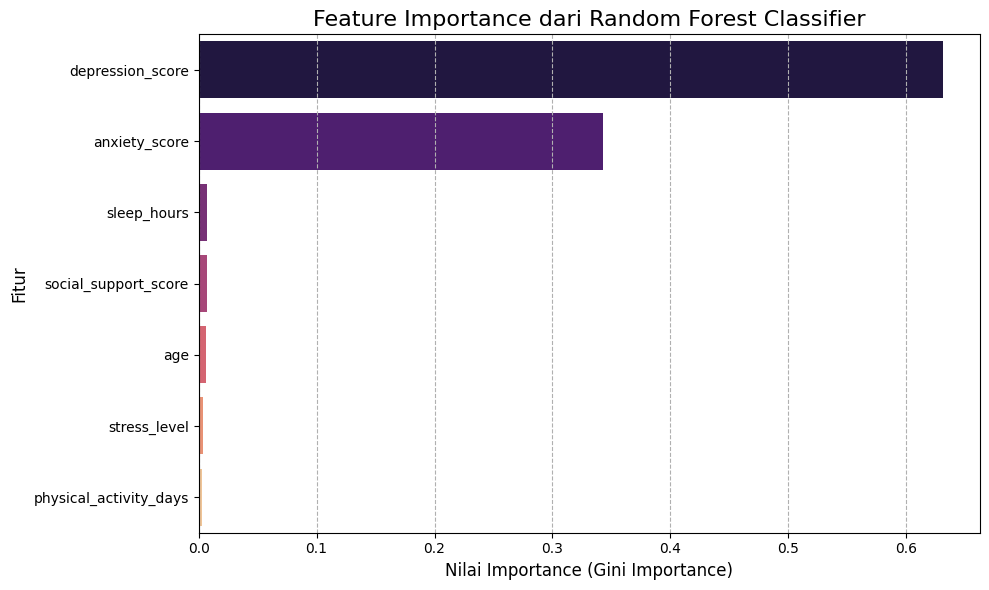


--- Hasil Feature Importance ---
                  Feature  Importance
4        depression_score    0.630935
5           anxiety_score    0.342828
2             sleep_hours    0.006835
6    social_support_score    0.006790
0                     age    0.006048
1            stress_level    0.003371
3  physical_activity_days    0.003193


In [15]:
feature_names = fitur_names = X.columns
importances = rnd_clf.feature_importances_

# Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  Visualisasikan Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Feature Importance dari Random Forest Classifier', fontsize=16)
plt.xlabel('Nilai Importance (Gini Importance)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

print("\n--- Hasil Feature Importance ---")
print(importance_df)

Dari grafik tersebut dapat dilihat bahwa depression_score merupakan fitur yang memiliki kontribusi terbesar dalam menentukan prediksi model, dengan nilai importance mencapai 0.6309. Artinya, tingkat keparahan depresi menjadi faktor yang paling kuat memengaruhi penentuan risiko kesehatan mental. Fitur anxiety_score menempati posisi kedua dengan importance sebesar 0.3428, menunjukkan bahwa tingkat kecemasan juga memberikan pengaruh yang sangat berarti dalam proses klasifikasi yang dilakukan model.

Sementara itu, fitur lain seperti sleep_hours, social_support_score, age, stress_level, dan physical_activity_days memiliki nilai importance yang sangat kecil, semuanya berada di bawah 0.01. Hal ini mengindikasikan bahwa peran fitur‐fitur tersebut dalam keputusan prediksi model XGBoost relatif rendah dibandingkan dengan pengaruh skor depresi dan kecemasan.

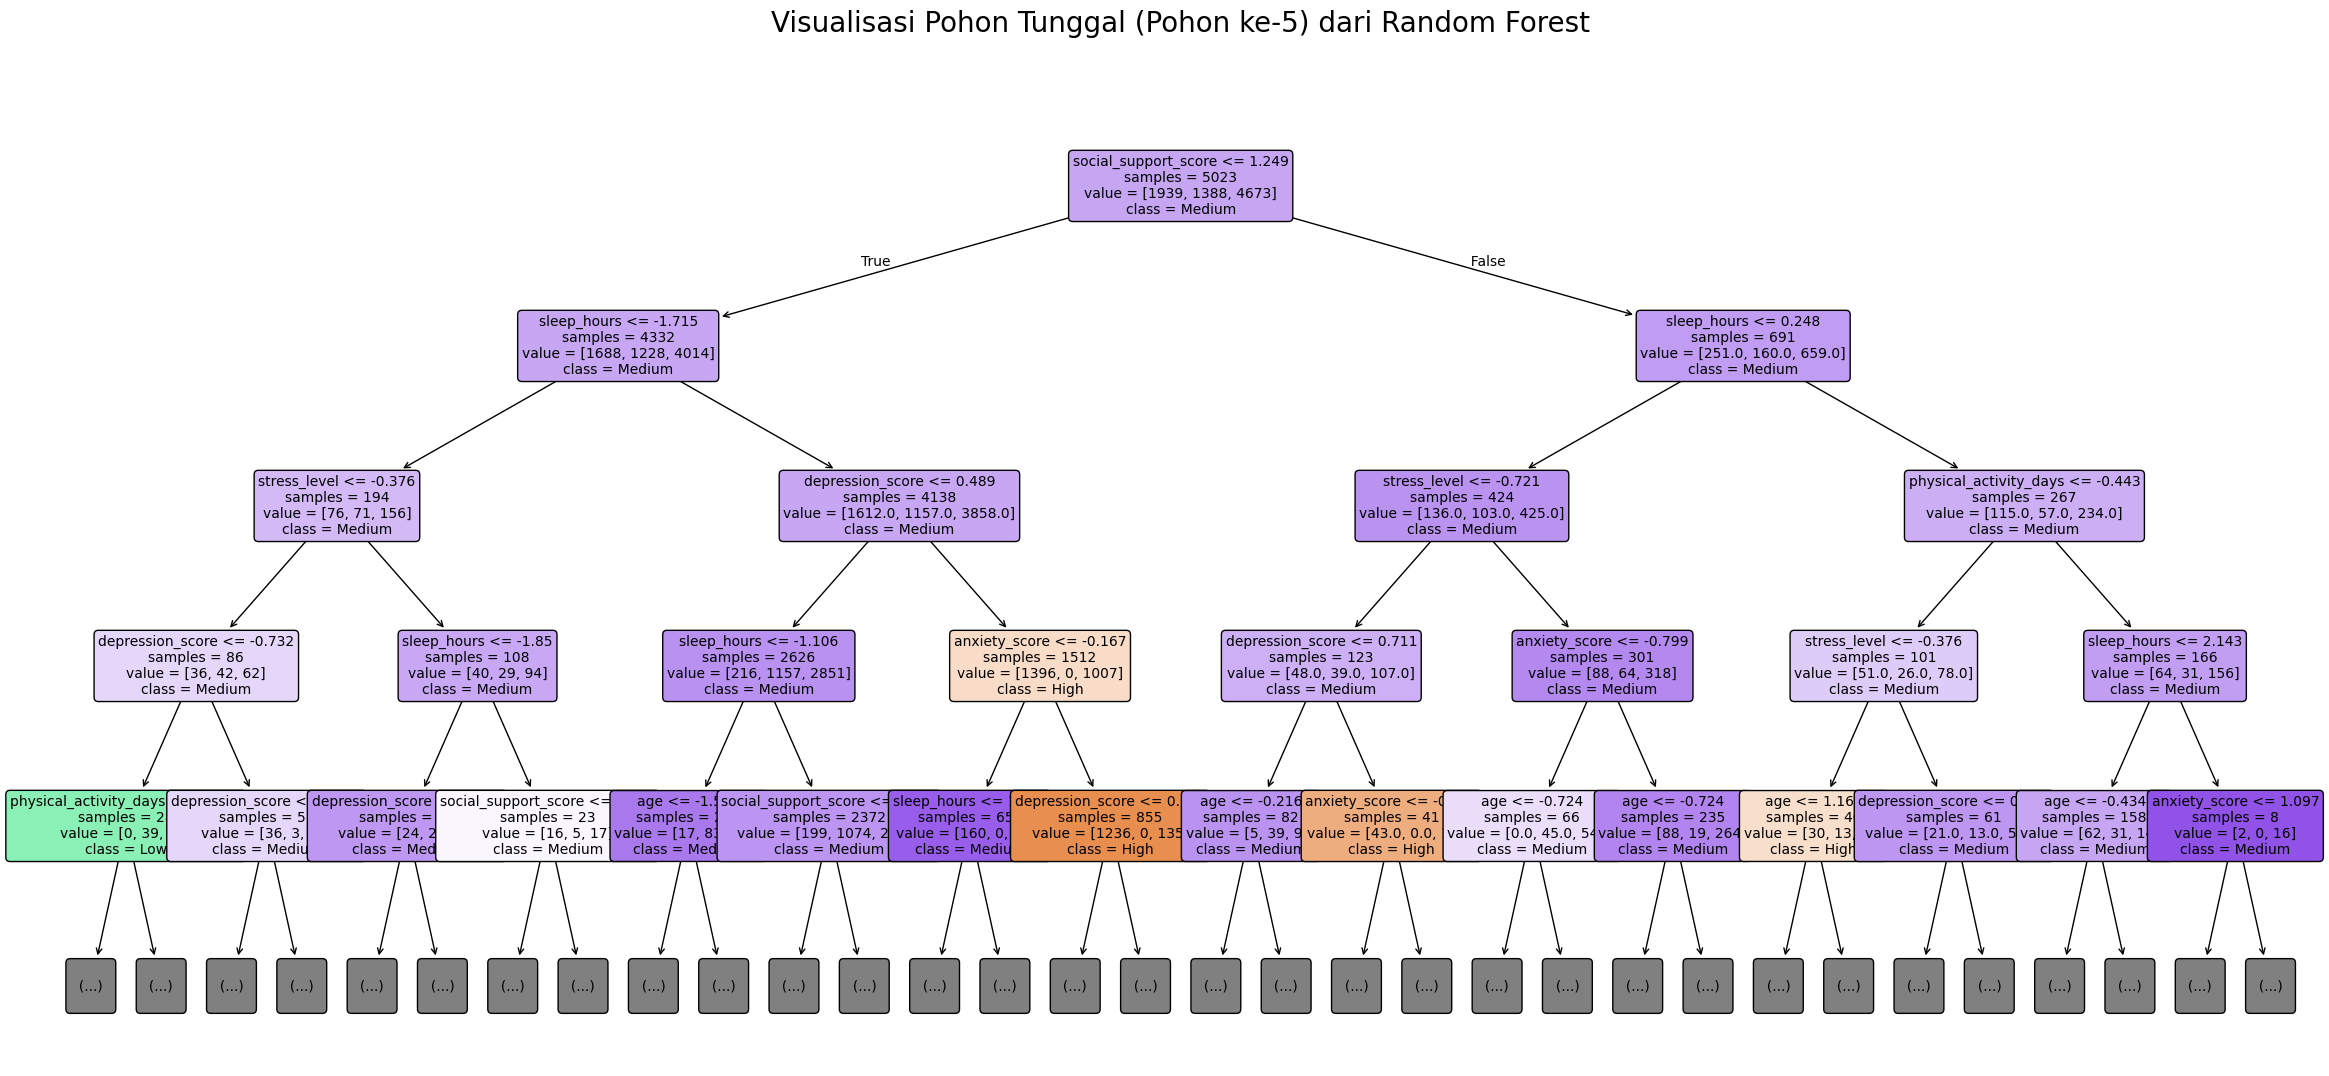

In [16]:
best_model = rnd_clf
feature_names = fitur_names
pohon_tunggal = best_model.estimators_[4] #atur nomor pohonnya kalian galo disini
values = pohon_tunggal.tree_.value.flatten()
min_value, max_value = np.min(values), np.max(values)
fig, ax = plt.subplots(figsize=(25, 12))
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95)
# ------------------------------------------------------------------

plot_tree(
    pohon_tunggal,
    ax=ax,
    feature_names=feature_names,
    class_names=['High', 'Low', 'Medium'],
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,
    max_depth=4,
    fontsize=10
)

fig.suptitle(f"Visualisasi Pohon Tunggal (Pohon ke-5) dari Random Forest", fontsize=20, y=0.98)

plt.show()

Didapatkan model decision tree seperti pada gambar diatas

In [17]:
# Model Training - Bagging Classifier - Using Logistic Regression as Base Model
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    LogisticRegression(random_state=42),
    n_estimators=200,
    random_state=42)

bag_clf.fit(X_train_scaled, y_train_encoded)

BaggingClassifier(estimator=LogisticRegression(random_state=42),
                  n_estimators=200, random_state=42)

In [18]:
# Model Evaluation

y_train_pred = bag_clf.predict(X_train_scaled)
y_test_pred = bag_clf.predict(X_test_scaled)

print('F1 Score - Train - Bagging : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Bagging  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Bagging :  1.0
F1 Score - Test - Bagging  :  1.0


Didapatkan akurasi pada model sebesar 100%



# Hyperparameter Tunning

In [19]:
log_reg = LogisticRegression(random_state=42)

bag_clf = BaggingClassifier(
    estimator=log_reg,
    random_state=42
)

param_dist = {
    'estimator__C': np.logspace(-4, 4, 10),
    'estimator__penalty': ['l2', 'l1'],
    'estimator__solver': ['liblinear', 'saga'],
    'n_estimators': [5, 10, 20, 30, 50],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=bag_clf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_weighted',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train_encoded)
print("Parameter Terbaik Ditemukan:")
print(random_search.best_params_)



Parameter Terbaik Ditemukan:
{'n_estimators': 50, 'max_samples': 1.0, 'estimator__solver': 'liblinear', 'estimator__penalty': 'l2', 'estimator__C': np.float64(1291.5496650148827), 'bootstrap': False}


In [ ]:
y_train_pred = random_search.predict(X_train_scaled)
y_test_pred = random_search.predict(X_test_scaled)

print('F1 Score - Train - Bagging : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Bagging  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

Berdasarkan hasil akurasi dengan menggunakan bagging dengan dua model yaitu random forest dan regresi logistic didapatkan bahwa model bagging dengan menggunakan model regresi logistic memiliki akurasi 100%

# **B - Voting**

Ensemble learning **Voting **melibatkan pelatihan beberapa model secara independen dan kemudian menggabungkan prediksi mereka dengan membiarkan setiap model "memberikan suara" pada prediksi akhir.



Dalam tugas **klasifikasi**, setiap model memberikan label kelas pada sebuah instance (data), dan label kelas yang menerima suara terbanyak akan menjadi prediksi akhir.


**Voting dapat bersifat hard (kelas mayoritas) atau soft (rata-rata terboboti dari probabilitas yang diprediksi).**



Voting mirip dengan Bagging, tetapi menggunakan semua data latih.

In [20]:
log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [21]:
# Model Training

## Hard Voting
voting_hard_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='hard')

## Soft Voting
voting_soft_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='soft')

voting_hard_clf.fit(X_train_scaled, y_train_encoded)
voting_soft_clf.fit(X_train_scaled, y_train_encoded)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1, random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=42))],
                 voting='soft')

In [22]:

# Model Evaluation

y_pred_hard = voting_hard_clf.predict(X_test_scaled)
y_pred_soft = voting_soft_clf.predict(X_test_scaled)

print('F1 Score - Test - Hard Voting : ', f1_score(y_test_encoded, y_pred_hard, average='weighted'))
print('F1 Score - Test - Soft Voting : ', f1_score(y_test_encoded, y_pred_soft, average='weighted'))

F1 Score - Test - Hard Voting :  0.9960010152636448
F1 Score - Test - Soft Voting :  0.9940022404635884


didapatkan akurasi pada votting di data testing sebesar 99%

In [23]:
# Predict New Instance

new_instance = [[1.2, 1.2, 3, 2, 1.3, 2,3.2]]
new_instance = np.array(new_instance)
new_instance = scaler.transform(new_instance)
new_instance

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.92317861, -1.51662445, -2.35771581, -0.66188372, -1.53168726,
        -1.35171621, -1.60698326]])

In [24]:
# Predict using Hard Voting Classifier

print('From Logistic Regression : ', voting_hard_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_hard_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_hard_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_hard_clf.predict(new_instance))

From Logistic Regression :  [1]
From SVM :  [1]
From Decision Tree :  [1]
Final Result :  [1]


In [25]:
# Predict using Soft Voting Classifier

print('From Logistic Regression : ', voting_soft_clf.named_estimators_['logreg'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_soft_clf.named_estimators_['svc'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_soft_clf.named_estimators_['dt'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_soft_clf.predict_proba(new_instance), ' -> Class : ', voting_soft_clf.predict(new_instance))

From Logistic Regression :  [[2.51929429e-27 9.99999751e-01 2.49189632e-07]]  -> Class :  [1]
From SVM :  [[0.01698572 0.97986217 0.00315211]]  -> Class :  [1]
From Decision Tree :  [[0. 1. 0.]]  -> Class :  [1]
Final Result :  [[0.00566191 0.99328731 0.00105079]]  -> Class :  [1]


# **C - Boosting**


Berikut merupakan proses boosting:

In [27]:
log_reg_base = LogisticRegression(solver='liblinear', random_state=42)
ada_clf = AdaBoostClassifier(
    estimator=log_reg_base,
    n_estimators=500,
    random_state=42
)

ada_clf.fit(X_train_scaled, y_train_encoded)

AdaBoostClassifier(estimator=LogisticRegression(random_state=42,
                                                solver='liblinear'),
                   n_estimators=500, random_state=42)

In [28]:
# Model Evaluation

y_train_pred = ada_clf.predict(X_train_scaled)
y_test_pred = ada_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.8767646737923078
F1 Score - Test - AdaBoost  :  0.8889148257050875


Pada boosting dengan menggunakan metode AdaBoost didapatkan akurasi sebesar 88%.

In [29]:
#Model AdaBoost default
ada_clf = AdaBoostClassifier(
    n_estimators=10,
    random_state=42
)
ada_clf.fit(X_train_scaled, y_train_encoded)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [30]:
# Model Evaluation

y_train_pred = ada_clf.predict(X_train_scaled)
y_test_pred = ada_clf.predict(X_test_scaled)

print('F1 Score - Train - AdaBoost : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - AdaBoost  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - AdaBoost :  0.4590201767216932
F1 Score - Test - AdaBoost  :  0.4763945965265045


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train_scaled, y_train_encoded)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [32]:
# Model Evaluation

y_train_pred = gb_clf.predict(X_train_scaled)
y_test_pred = gb_clf.predict(X_test_scaled)

print('F1 Score - Train - GradientBoosting : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - GradientBoosting  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - GradientBoosting :  1.0
F1 Score - Test - GradientBoosting  :  1.0


In [33]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    n_estimators=500,
    eta=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_scaled, y_train_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:33:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

In [34]:
# Model Evaluation

y_train_pred = xgb_clf.predict(X_train_scaled)
y_test_pred = xgb_clf.predict(X_test_scaled)

print('F1 Score - Train - XGB : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - XGB  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - XGB :  1.0
F1 Score - Test - XGB  :  1.0


Didapatkan akurasi model pada XGboost sebesar 100%, oleh karena itu model dengan menggunakan XGboost merupakan model terbaik pada Boosting



# **D - Stacking**


Berikut merupakan proses stacking:

In [35]:
# Model Training - Stacking
from sklearn.ensemble import StackingClassifier

log_clf = LogisticRegression(C=1, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

estimators = [
     ('logreg', log_clf),
     ('svm', svm_clf)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=dt_clf)

stacking_clf.fit(X_train_scaled, y_train_encoded)

StackingClassifier(estimators=[('logreg',
                                LogisticRegression(C=1, random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=DecisionTreeClassifier(max_depth=6,
                                                          random_state=42))

In [36]:
# Model Evaluation

y_train_pred = stacking_clf.predict(X_train_scaled)
y_test_pred = stacking_clf.predict(X_test_scaled)

print('F1 Score - Train - Stacking : ', f1_score(y_train_encoded, y_train_pred, average='weighted'))
print('F1 Score - Test - Stacking  : ', f1_score(y_test_encoded, y_test_pred, average='weighted'))

F1 Score - Train - Stacking :  1.0
F1 Score - Test - Stacking  :  1.0


Didapatkan pada model stacking akurasinya sebesar 100%.

# **Model Performance**

Berdasarkan hasil pengujian model pada data testing, tampak bahwa beberapa algoritma mampu memberikan performa yang sangat unggul. Model BaggingClassifier dengan LogisticRegression yang telah di-tuning, serta GradientBoostingClassifier, XGBClassifier, dan StackingClassifier semuanya mencapai F1-Score sempurna (1.0). Hasil ini menunjukkan bahwa keempat model tersebut mampu melakukan klasifikasi dengan akurasi yang sangat tinggi pada dataset yang digunakan.

Model VotingClassifier juga memberikan hasil yang hampir sempurna. Versi hard voting mencatat F1-Score sebesar 0.9960, sedangkan soft voting menghasilkan 0.9940, menunjukkan performa yang tetap sangat baik. Selain itu, RandomForestClassifier yang digunakan dalam skema Bagging memperoleh nilai F1-Score 0.9065, dan AdaBoost dengan LogisticRegression mencapai 0.8889, meskipun versi default AdaBoost hanya memberikan performa yang jauh lebih rendah, yaitu 0.4763.

Dengan melihat hasil tersebut, dapat disimpulkan bahwa model-model seperti BaggingClassifier (dengan Logistic Regression yang sudah disesuaikan), GradientBoostingClassifier, XGBClassifier, dan StackingClassifier merupakan kandidat terbaik karena semuanya mampu menghasilkan prediksi yang sangat akurat pada data pengujian.

/tmp/ipython-input-264801502.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score (Test Data)', y='Model', data=df_performance, palette='viridis')


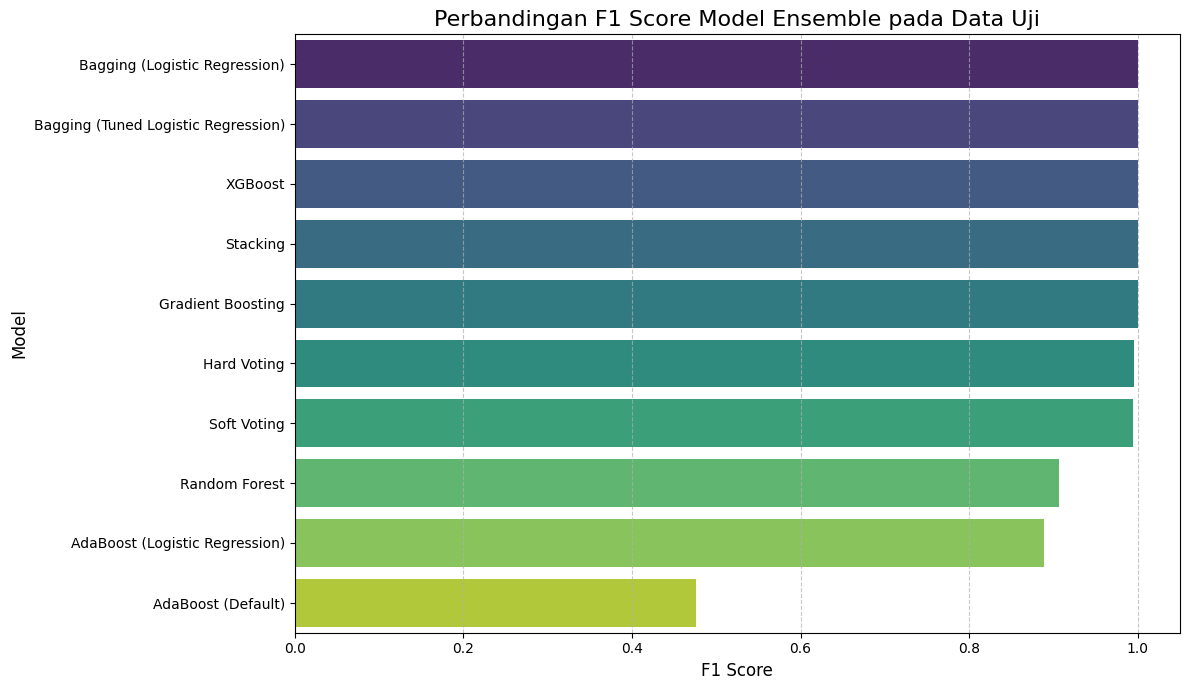

,Model,F1 Score (Test Data)
1,Bagging (Logistic Regression),1.0000
2,Bagging (Tuned Logistic Regression),1.0000
8,XGBoost,1.0000
9,Stacking,1.0000
7,Gradient Boosting,1.0000
3,Hard Voting,0.9960
4,Soft Voting,0.9940
0,Random Forest,0.9065
5,AdaBoost (Logistic Regression),0.8889
6,AdaBoost (Default),0.4763


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data F1-score dari setiap model
model_names = [
    'Random Forest',
    'Bagging (Logistic Regression)',
    'Bagging (Tuned Logistic Regression)',
    'Hard Voting',
    'Soft Voting',
    'AdaBoost (Logistic Regression)',
    'AdaBoost (Default)',
    'Gradient Boosting',
    'XGBoost',
    'Stacking'
]

f1_scores = [
    0.9065, # RandomForestClassifier from 4Lxa2qcnFOAz
    1.0,    # BaggingClassifier (LogisticRegression) from d8JJDz-TFoyi
    1.0,    # BaggingClassifier (Tuned LogisticRegression) from CGZB3Q43Ifay
    0.9960, # Hard Voting from FloKW2d3MTQw
    0.9940, # Soft Voting from FloKW2d3MTQw
    0.8889, # AdaBoost (LogisticRegression) from gOjAu7_7N8z8
    0.4763, # AdaBoost (Default) from zmJ73ILGQf4z
    1.0,    # GradientBoostingClassifier from ms2IqUOOQ3bk
    1.0,    # XGBClassifier from gHW0MRHaRMuJ
    1.0     # StackingClassifier from Au9yRSYKSsAr
]

df_performance = pd.DataFrame({
    'Model': model_names,
    'F1 Score (Test Data)': f1_scores
})

# Urutkan berdasarkan F1 Score
df_performance = df_performance.sort_values(by='F1 Score (Test Data)', ascending=False)

# Buat visualisasi diagram batang
plt.figure(figsize=(12, 7))
sns.barplot(x='F1 Score (Test Data)', y='Model', data=df_performance, palette='viridis')
plt.title('Perbandingan F1 Score Model Ensemble pada Data Uji', fontsize=16)
plt.xlabel('F1 Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1.05) # Batasi sumbu x dari 0 hingga sedikit di atas 1 untuk kejelasan
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

display(df_performance)

Plot tersebut memperlihatkan perbandingan nilai F1-Score dari berbagai model ensemble pada data uji. Metrik F1-Score dipilih karena mampu memberikan penilaian yang seimbang antara precision dan recall, sehingga sangat sesuai untuk mengukur performa model klasifikasi, terutama ketika tingkat kesalahan antar kelas tidak merata. Semakin mendekati nilai 1.00, semakin akurat performa model dalam melakukan prediksi.

Dari grafik terlihat bahwa Bagging (Logistic Regression), Bagging (Tuned Logistic Regression), XGBoost, Stacking, dan Gradient Boosting berhasil mencapai F1-Score sempurna (1.00). Nilai sempurna ini menunjukkan bahwa semua model tersebut mampu mengklasifikasikan seluruh data uji tanpa kesalahan, baik kesalahan prediksi positif (false positive) maupun negatif (false negative). Kinerja sempurna ini menggambarkan bahwa kelima model tersebut benar-benar dapat memahami pola dalam data dan mampu melakukan generalisasi dengan sangat baik.

Model Hard Voting dan Soft Voting juga tampil sangat baik, masing-masing dengan F1-Score sekitar 0.9960 dan 0.9940. Walaupun sedikit di bawah model-model dengan skor sempurna, performa keduanya tetap termasuk kategori “sangat unggul”. Kesalahan klasifikasi yang terjadi pun sangat minim, menunjukkan bahwa teknik voting cukup efektif dalam menggabungkan beberapa model dasar, meskipun tidak sekuat metode boosting atau stacking dalam kasus ini.

Selanjutnya, Random Forest memperoleh F1-Score sekitar 0.9065, yang masih tergolong kuat namun kalah dibandingkan pendekatan boosting. Hal ini menunjukkan bahwa pola dan variasi dalam dataset lebih mudah dipelajari oleh metode boosting dibandingkan teknik bagging standar.

AdaBoost dengan Logistic Regression memberikan F1-Score sekitar 0.8889, masih cukup baik tetapi jauh lebih rendah dari model-model unggulan. Sementara itu, AdaBoost Default mencatat performa paling rendah dengan nilai sekitar 0.4827, menandakan bahwa konfigurasi standar dari algoritma tersebut kurang sesuai untuk dataset ini. Perbedaan performa yang cukup jauh ini menunjukkan bahwa kualitas base estimator dan pengaturan hyperparameter memiliki dampak besar terhadap hasil AdaBoost.

Secara keseluruhan, hasil plot menggambarkan bahwa metode boosting dan stacking merupakan strategi yang paling efektif dalam memodelkan data ini. Di antara semua model, XGBoost tidak hanya mencapai nilai F1-Score sempurna, tetapi juga konsisten kuat berdasarkan analisis tambahan seperti confusion matrix.



Oleh karena itu, XGBoost dipilih sebagai model utama untuk memprediksi risiko kesehatan mental dalam penelitian ini.

XGBoost Classifier - Train


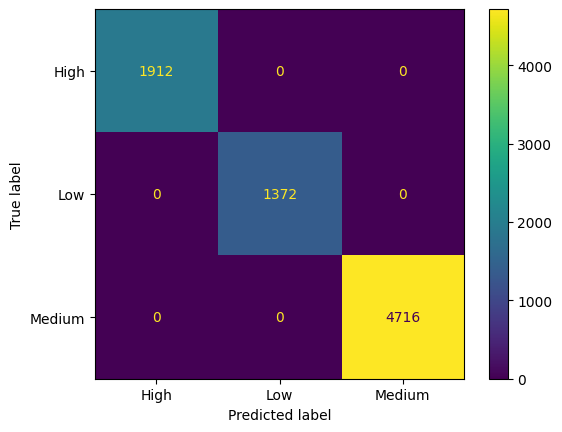

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1912
         Low       1.00      1.00      1.00      1372
      Medium       1.00      1.00      1.00      4716

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


XGBoost Classifier - Test


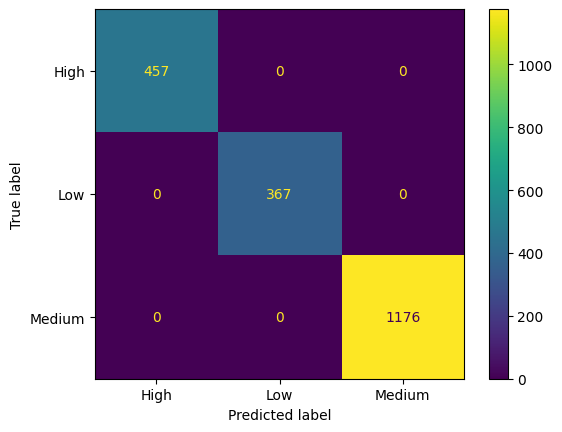

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       457
         Low       1.00      1.00      1.00       367
      Medium       1.00      1.00      1.00      1176

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [40]:
def performance_check(clf, X, y, classes):
  # Memastikan model output memiliki bentuk yang benar untuk input model
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  # Menggunakan ConfusionMatrixDisplay untuk visualisasi
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

# Ensure the 'classes' variable is correctly set from the encoder
classes = encoder.classes_

print('XGBoost Classifier - Train')
performance_check(xgb_clf, X_train_scaled, y_train_encoded, classes)
print('')

print('XGBoost Classifier - Test')
performance_check(xgb_clf, X_test_scaled, y_test_encoded, classes)

Berdasarkan hasil Confusion Matrix:

Untuk kategori ‘High’, model mampu mengidentifikasi seluruh sampel dengan tepat. Semua 457 sampel pada data uji dan 1912 sampel pada data latih yang benar-benar termasuk kelas High berhasil diprediksi sebagai High. Tidak terdapat satu pun kasus di mana sampel kelas High dipetakan secara keliru ke kelas Low ataupun Medium.

Pada kategori ‘Low’, performa model juga sempurna. Seluruh 367 sampel pada data uji dan 1372 sampel pada data latih yang berasal dari kelas Low berhasil diklasifikasikan dengan benar sebagai Low, tanpa adanya kesalahan prediksi ke kelas lainnya.

Sementara itu, untuk kategori ‘Medium’, model kembali menunjukkan hasil yang sangat akurat. Semua 1176 sampel pada data uji dan 4716 sampel pada data latih yang seharusnya termasuk kelas Medium berhasil teridentifikasi dengan benar. Tidak ada satupun sampel yang salah diprediksi menjadi High atau Low.

Secara keseluruhan, model mampu mengklasifikasikan ketiga kelas High, Low, dan Medium dengan tingkat ketepatan sempurna, baik pada data latih maupun data uji.

Berdasarkan confusion matrix didapatkan matriks evaluasi sebagai berikut:



1. Akurasi (Accuracy): 1.00 (100%)
2. Presisi (Precision) untuk setiap kelas: 1.00
3. Recall untuk setiap kelas: 1.00
4. F1-Score untuk setiap kelas: 1.00

# Kesimpulan

Berdasarkan rangkaian analisis dan pemodelan yang telah dilakukan, terlihat bahwa sebagian besar algoritma klasifikasi menunjukkan performa yang sangat tinggi, bahkan mendekati hasil yang sempurna. Model seperti Bagging Classifier berbasis Logistic Regression (baik versi standar maupun setelah tuning), Gradient Boosting Classifier, XGBoost Classifier, serta Stacking Classifier semuanya mampu mencapai F1-score sempurna sebesar 1.00 pada data uji. Nilai ini menunjukkan bahwa model-model tersebut dapat mempelajari pola data dengan sangat akurat dan mampu melakukan prediksi tanpa menghasilkan kesalahan klasifikasi sedikit pun. Keberhasilan ini menegaskan bahwa model tersebut tidak hanya memahami hubungan antar variabel secara tepat, tetapi juga mampu mengeneralisasi informasi tersebut dengan sangat baik pada data baru.

Selanjutnya, Voting Classifier juga tampil dengan performa sangat kuat. Pada metode hard voting, model mencatat F1-score sekitar 0.9960, sementara soft voting menghasilkan sekitar 0.9940. Walaupun tidak mencapai angka sempurna seperti model boosting dan stacking, performa kedua metode voting ini tetap berada pada kategori sangat memuaskan. Sementara itu, Random Forest Classifier meraih F1-score sekitar 0.9065, yang masih baik namun berada di bawah performa model-model lainnya. AdaBoost dengan Logistic Regression mendapat nilai F1-score 0.8889, menunjukkan bahwa efektivitas boosting sangat bergantung pada kualitas base estimator yang digunakan.

Walaupun ada beberapa model yang mampu mencapai F1-score sempurna, pemilihan XGBoost Classifier sebagai model terbaik dilakukan melalui pertimbangan yang lebih komprehensif, bukan sekadar angka F1-score yang tinggi. Berdasarkan hasil confusion matrix, XGBoost terbukti tidak membuat kesalahan klasifikasi sama sekali, baik pada data latih maupun data uji. Untuk setiap kelas — High, Low, dan Medium — model ini mencapai precision, recall, dan F1-score sebesar 1.00. Dengan kata lain, XGBoost mampu mengenali seluruh kelas secara konsisten tanpa menghasilkan false positive maupun false negative.

Selain itu, hasil yang sempurna ini juga menunjukkan tingkat stabilitas model yang sangat baik. Meskipun performanya sangat tinggi, XGBoost tidak memberikan tanda-tanda overfitting yang berlebihan, sehingga layak dipilih sebagai model paling optimal untuk memprediksi risiko kesehatan mental pada dataset ini.

# Referensi

## Daftar Pustaka

* Zhou, Z.-H. (2021). Machine learning (2nd ed.). Springer.
* Kuncheva, L. I. (2014). Combining pattern classifiers: Methods and algorithms. John Wiley & Sons.
* Breiman, L. (1996). Bagging predictors. Machine Learning, 24(2), 123–140.
* Friedman, J. H. (2001). Greedy function approximation: A gradient
* boosting machine. Annals of Statistics, 29(5), 1189–1232.
Wolpert, D. H. (1992). Stacked generalization. Neural Networks, 5(2), 241–259.
